In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


array([[<AxesSubplot:title={'center':'YearsExperience'}>]], dtype=object)

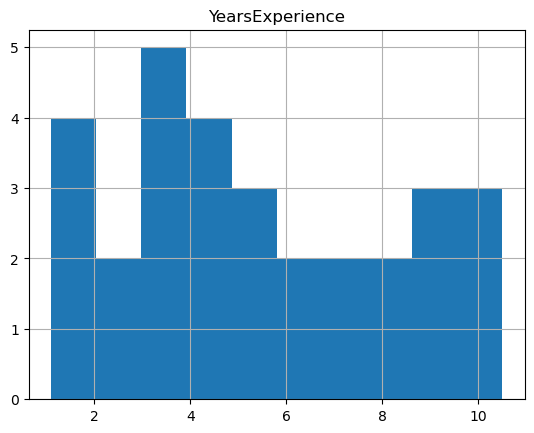

In [5]:
df.hist("YearsExperience")

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

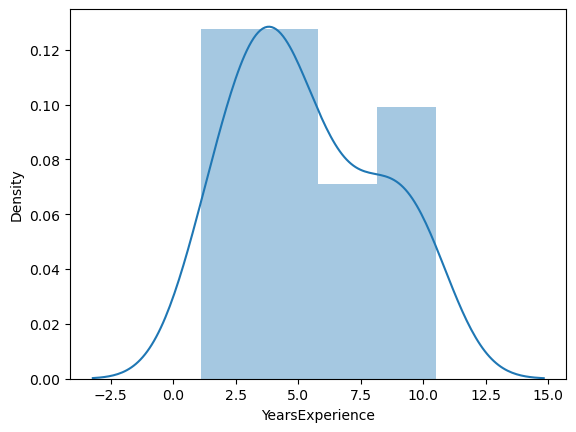

In [6]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

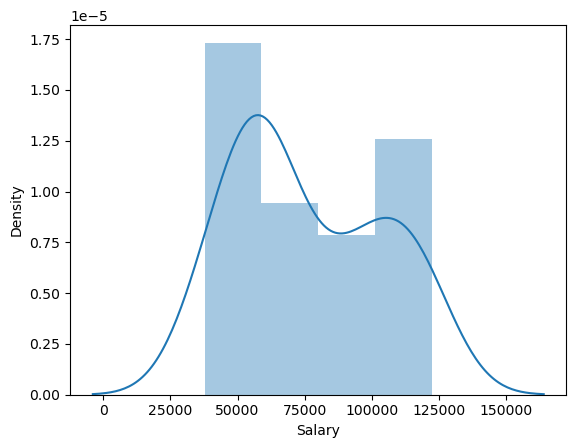

In [7]:
sns.distplot(df["Salary"])

In [8]:
df["log_Salary"]=np.log(df["Salary"])

In [9]:
df["log_YearsExperience"]=np.log(df["YearsExperience"])

<AxesSubplot:xlabel='log_Salary', ylabel='Density'>

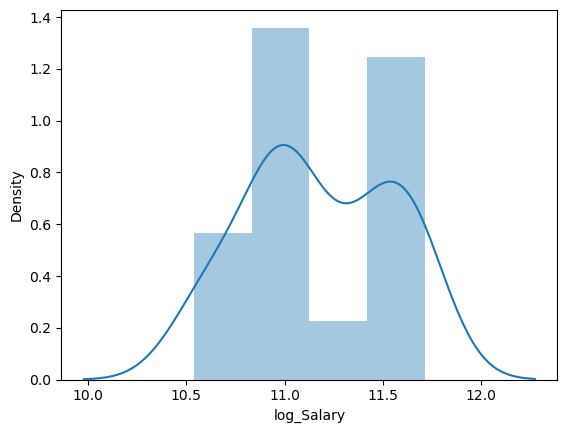

In [10]:
sns.distplot(df["log_Salary"])

<AxesSubplot:xlabel='log_YearsExperience', ylabel='Density'>

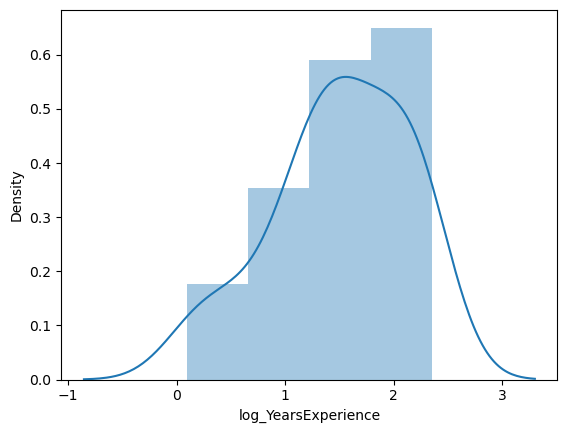

In [11]:
sns.distplot(df["log_YearsExperience"])

In [12]:
df.head()

,YearsExperience,Salary,log_Salary,log_YearsExperience
0,1.1,39343.0,10.580073,0.095310
1,1.3,46205.0,10.740843,0.262364
2,1.5,37731.0,10.538237,0.405465
3,2.0,43525.0,10.681091,0.693147
4,2.2,39891.0,10.593906,0.788457


array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

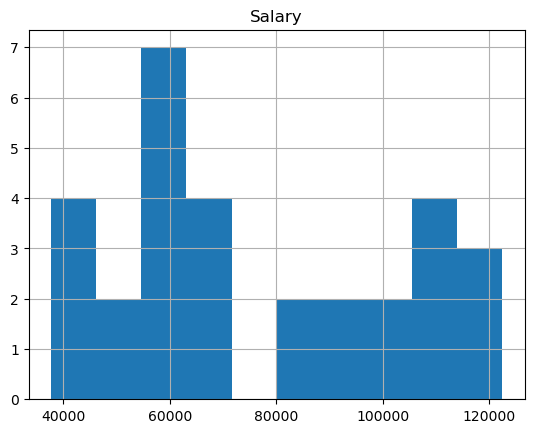

In [13]:
df.hist("Salary")

array([[<AxesSubplot:title={'center':'log_Salary'}>]], dtype=object)

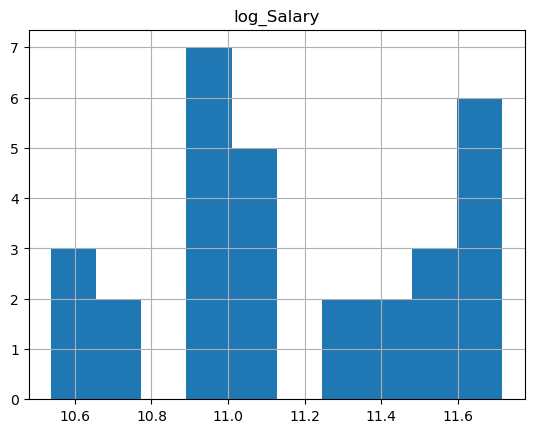

In [14]:
df.hist("log_Salary")

array([[<AxesSubplot:title={'center':'YearsExperience'}>]], dtype=object)

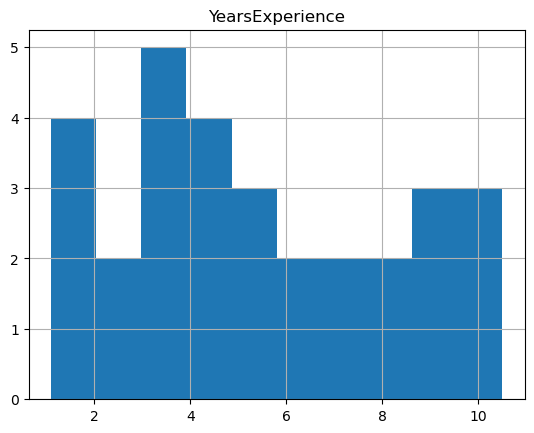

In [15]:
df.hist("YearsExperience")

array([[<AxesSubplot:title={'center':'log_YearsExperience'}>]],
      dtype=object)

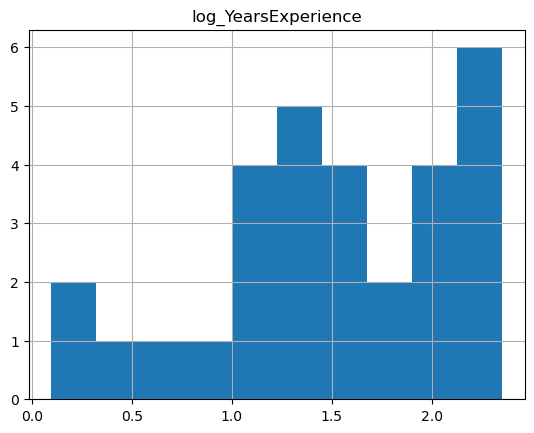

In [16]:
df.hist("log_YearsExperience")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearsExperience      30 non-null     float64
 1   Salary               30 non-null     float64
 2   log_Salary           30 non-null     float64
 3   log_YearsExperience  30 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


In [18]:
log_model=smf.ols("log_Salary~log_YearsExperience", data=df).fit()

In [19]:
normal_model=smf.ols("Salary~YearsExperience",data=df).fit()

eval_env: 1


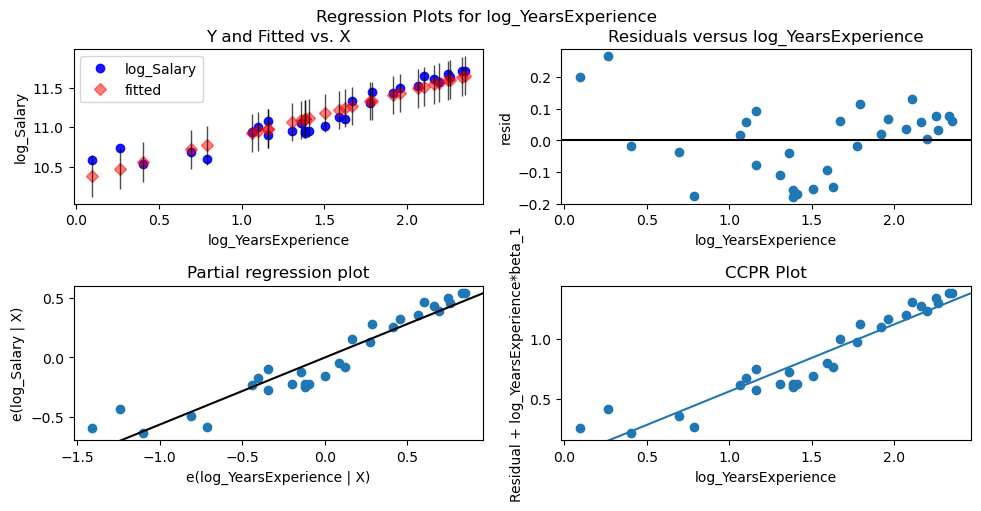

In [20]:
figure = plt.figure(figsize=(10,5))
figure = sm.graphics.plot_regress_exog(log_model,"log_YearsExperience", fig=figure)

eval_env: 1


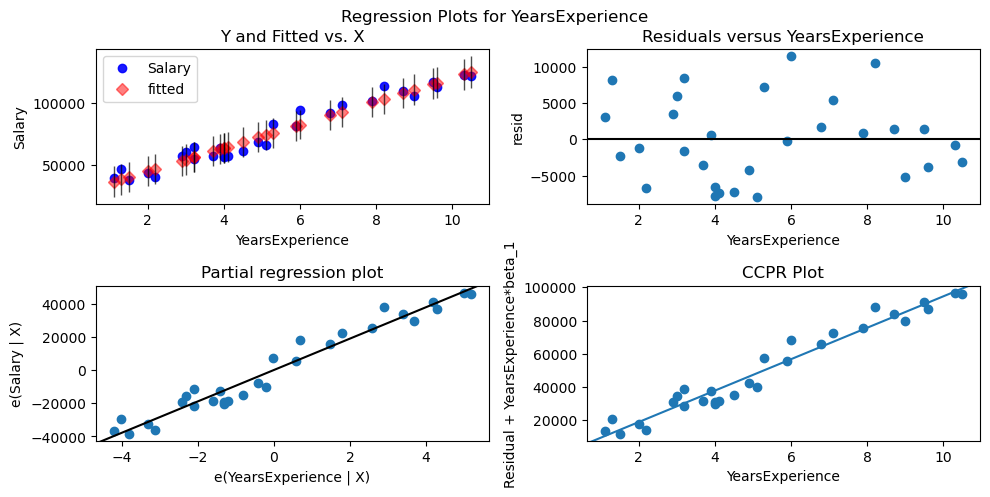

In [21]:
figure = plt.figure(figsize=(10,5))
figure = sm.graphics.plot_regress_exog(normal_model,"YearsExperience", fig=figure)

In [22]:
log_model.params

Intercept              10.328043
log_YearsExperience     0.562089
dtype: float64

In [23]:
normal_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [24]:
Accuracy=log_model.rsquared
Accuracy

0.905215072581715

In [25]:
Accuracy1=normal_model.rsquared
Accuracy1

0.9569566641435086

In [26]:
normal_model.rsquared_adj

0.9554194021486339

In [27]:
log_model.rsquared_adj

0.9018298966024905

In [ ]:
print("This model can Predict salary for experience in range:", (df["YearsExperience"].min(), df["YearsExperience"].max())," years With Accuracy of ", Accuracy*100,"%" )
newdata=pd.Series([float(input("Enter your Experience : "))])
data_predict=pd.DataFrame(newdata, columns=["YearsExperience"])
Nsalary=normal_model.predict(data_predict)
print("Based on yor Experience your Expected salary is: ", (Nsalary.values)[0])

This model can Predict salary for experience in range: (1.1, 10.5)  years With Accuracy of  90.5215072581715 %
